In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline

import seaborn as sns

# Data preprocessing and machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Miscellaneous libraries
import traceback
import math
import datetime


In [2]:
# Import data from CSV file
file_path = '/Users/mit/Documents/IIITB/Lending_Club_CaseStudy/Lending_Club_CaseStudy/dataset/loan.csv'

try:
    loan_df = pd.read_csv(file_path, delimiter=',', low_memory=False)
    print('Data Load: Successful')
except FileNotFoundError:
    print(f'Error: File "{file_path}" not found.')
except pd.errors.EmptyDataError:
    print(f'Error: File "{file_path}" is empty.')
except pd.errors.ParserError:
    print(f'Error: Unable to parse data from file "{file_path}". Check the file format.')
except Exception as e:
    traceback.print_exc()
    print(f'Error: An unexpected error occurred while loading data. {str(e)}')
    print('Data Load: Failure')


Data Load: Successful


In [3]:
# Import data from Excel file
file_path = '/Users/mit/Documents/IIITB/Lending_Club_CaseStudy/Lending_Club_CaseStudy/dataset/Data_Dictionary.xlsx'

try:
    info_df = pd.read_excel(file_path)
    print('Data Load: Successful')
except FileNotFoundError:
    print(f'Error: File "{file_path}" not found.')
except pd.errors.EmptyDataError:
    print(f'Error: File "{file_path}" is empty.')
except pd.errors.ParserError:
    print(f'Error: Unable to parse data from file "{file_path}". Check the file format.')
except Exception as e:
    traceback.print_exc()
    print(f'Error: An unexpected error occurred while loading data. {str(e)}')
    print('Data Load: Failure')


Data Load: Successful


In [4]:
loan_df.shape

(39717, 111)

In [5]:
loan_df.head(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan_df.tail(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39707,92666,92661,5000,5000,525.0,36 months,9.33%,159.77,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39709,92533,92529,5000,5000,675.0,36 months,11.22%,164.23,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39710,92507,92502,5000,5000,250.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39711,92402,92390,5000,5000,700.0,36 months,8.70%,158.30,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check data types of columns
data_types = loan_df.dtypes

# Check for missing values
missing_values = loan_df.isnull().sum()

# Display data types and missing values
print("Data Types:")
print(data_types)

print("\nMissing Values:")
print(missing_values)


Data Types:
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

Missing Values:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [8]:
pd.DataFrame(loan_df.dtypes).reset_index().rename(columns={'index': 'variable', 0: 'datatype'}).style


,variable,datatype
0,id,int64
1,member_id,int64
2,loan_amnt,int64
3,funded_amnt,int64
4,funded_amnt_inv,float64
5,term,object
6,int_rate,object
7,installment,float64
8,grade,object
9,sub_grade,object


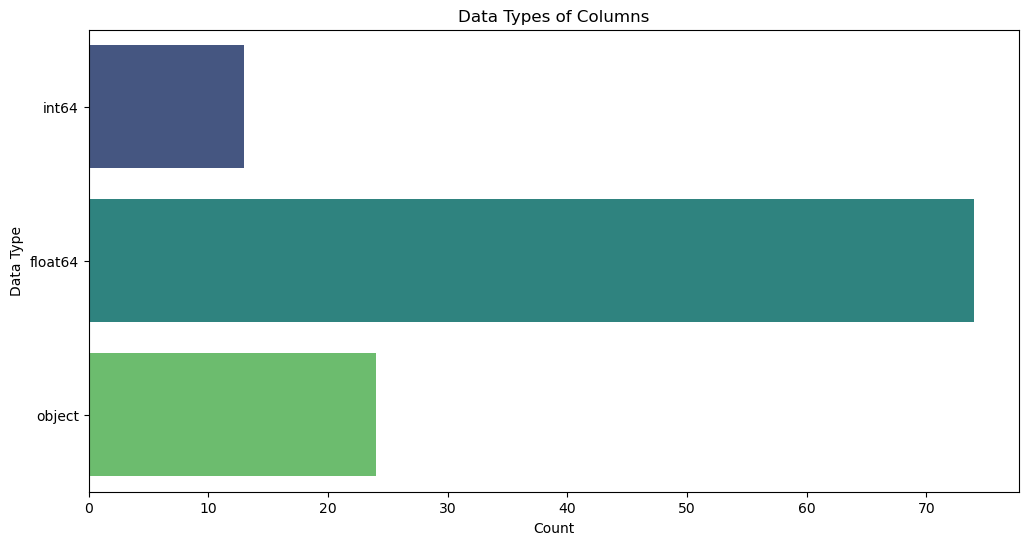

In [9]:

dtypes_df = pd.DataFrame(loan_df.dtypes).reset_index().rename(columns={'index': 'variable', 0: 'datatype'})

# Identifying numerical columns
numerical_columns = dtypes_df[dtypes_df['datatype'].isin([np.int64, np.float64])]['variable']

# Creating a bar plot using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=dtypes_df['datatype'], palette='viridis')
plt.title('Data Types of Columns')
plt.xlabel('Count')
plt.ylabel('Data Type')
plt.show()


In [10]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [11]:
# Assuming info_df is a DataFrame containing columns 'LoanStatNew' and 'Description'
info_df[['LoanStatNew', 'Description']].style.apply(lambda x: ['background-color: lightblue' if val == 'example_value' else '' for val in x], axis=1)


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [12]:
# Identify variables present in the data dictionary but missing in the loan dataset
missing_variables = info_df[~info_df['LoanStatNew'].isin(loan_df.columns)][['LoanStatNew', 'Description']]

# Display the variables that are listed in the data dictionary but missing in the 'loan' dataset
missing_variables.style.set_caption("Variables present in the data dictionary but missing in the 'loan' dataset")


,LoanStatNew,Description
21,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
22,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
37,last_fico_range_high,The upper boundary range the borrower’s last FICO pulled belongs to.
38,last_fico_range_low,The lower boundary range the borrower’s last FICO pulled belongs to.
110,total_rev_hi_lim,Total revolving high credit/credit limit
113,verified_status_joint,"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"
115,nan,nan
116,nan,* Employer Title replaces Employer Name for all loans listed after 9/23/2013


In [13]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
loan_df.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
20378,659782,843845,15000,15000,14975.00000,60 months,14.91%,356.15,D,D2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
21694,640600,820048,24000,24000,23996.54478,36 months,14.46%,825.64,D,D2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
36432,409062,459561,15000,15000,11328.82694,36 months,12.53%,502.00,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
29840,517105,668315,4000,4000,4000.00000,36 months,6.76%,123.07,A,A2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6559,966895,1187789,1800,1800,1800.00000,36 months,10.65%,58.64,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4890,995782,1220364,1000,1000,1000.00000,36 months,7.51%,31.12,A,A3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8691,861168,1074048,13200,13200,13125.00000,60 months,19.29%,344.53,E,E4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
33711,463130,579705,3000,3000,3000.00000,36 months,7.40%,93.18,A,A2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6180,972997,1194971,24000,24000,23975.00000,60 months,18.25%,612.72,D,D5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
31325,496716,636545,7000,7000,6925.00000,36 months,10.62%,227.92,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [16]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [17]:
def analyze_dataframe(df):
    '''
    Analyze the input DataFrame and generate a summary with information on null counts, duplicate counts, and descriptive statistics for each variable/column.

    Parameters:
    - df (pd.DataFrame): Input DataFrame to be analyzed.

    Returns:
    - pd.DataFrame: Summary DataFrame containing statistics for each variable.
    '''
    # Initialize an empty DataFrame to store the summary
    summary_df = pd.DataFrame()

    # Iterate through each column in the input DataFrame
    for i, col in enumerate(df.columns):
        # Store the variable name in the summary DataFrame
        summary_df.loc[i, 'Variable'] = col

        # Record the data type of the variable
        summary_df.loc[i, 'Data Type'] = df[col].dtype

        # Count the number of missing values in the variable
        summary_df.loc[i, 'Null Count'] = df[col].isna().sum()

        # Count the number of duplicate values in the variable
        summary_df.loc[i, 'Duplicate Count'] = df[col].duplicated().sum()

        # Record the total count of non-null values in the variable
        summary_df.loc[i, 'Total Count'] = df[col].describe()['count']

        # For numerical variables, tabulate additional descriptive statistics
        if df[col].dtype in ['int64', 'float64']:
            summary_df.loc[i, 'Mean'] = df[col].describe()['mean']
            summary_df.loc[i, 'Std Dev'] = df[col].describe()['std']
            summary_df.loc[i, 'Min'] = df[col].describe()['min']
            summary_df.loc[i, '25%'] = df[col].describe()['25%']
            summary_df.loc[i, '50%'] = df[col].describe()['50%']
            summary_df.loc[i, '75%'] = df[col].describe()['75%']
            summary_df.loc[i, 'Max'] = df[col].describe()['max']

        # For categorical variables, tabulate unique values, most frequent value, and its frequency
        elif df[col].dtype == 'object':
            summary_df.loc[i, 'Unique Values'] = df[col].nunique()
            summary_df.loc[i, 'Top Value'] = df[col].describe()['top']
            summary_df.loc[i, 'Frequency'] = df[col].describe()['freq']

    return summary_df


In [18]:
def highlight_positive_values(column, color):
    '''
    Apply highlighting to values greater than 0 in the input column of the DataFrame.

    Parameters:
    - column (pd.Series): Input column of the DataFrame.
    - color (str): Color of the text for highlighting.

    Returns:
    - np.array: Array specifying the style for each element.
    '''
    # Use np.where to conditionally apply styling based on values greater than 0
    return np.where(column > 0, f"color: {color};", None)



In [19]:
analyze_df = analyze_dataframe(loan_df)

In [20]:
analyze_df.style.apply(highlight_positive_values, color='red', axis=1, subset="Null Count")


,Variable,Data Type,Null Count,Duplicate Count,Total Count,Mean,Std Dev,Min,25%,50%,75%,Max,Unique Values,Top Value,Frequency
0,id,int64,0.000000,0.000000,39717.000000,683131.913060,210694.132915,54734.000000,516221.000000,665665.000000,837755.000000,1077501.000000,nan,nan,nan
1,member_id,int64,0.000000,0.000000,39717.000000,850463.559408,265678.307421,70699.000000,666780.000000,850812.000000,1047339.000000,1314167.000000,nan,nan,nan
2,loan_amnt,int64,0.000000,38832.000000,39717.000000,11219.443815,7456.670694,500.000000,5500.000000,10000.000000,15000.000000,35000.000000,nan,nan,nan
3,funded_amnt,int64,0.000000,38676.000000,39717.000000,10947.713196,7187.238670,500.000000,5400.000000,9600.000000,15000.000000,35000.000000,nan,nan,nan
4,funded_amnt_inv,float64,0.000000,31512.000000,39717.000000,10397.448868,7128.450439,0.000000,5000.000000,8975.000000,14400.000000,35000.000000,nan,nan,nan
5,term,object,0.000000,39715.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,2.000000,36 months,29096.000000
6,int_rate,object,0.000000,39346.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,371.000000,10.99%,956.000000
7,installment,float64,0.000000,24334.000000,39717.000000,324.561922,208.874874,15.690000,167.020000,280.220000,430.780000,1305.190000,nan,nan,nan
8,grade,object,0.000000,39710.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,7.000000,B,12020.000000
9,sub_grade,object,0.000000,39682.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,35.000000,B3,2917.000000


Following a thorough programmatic assessment of the `loan_df` data frame, I identified the existence of null values in several variables/columns. To further refine the data quality, the next step involves the removal of columns with null values surpassing the 70% threshold. This strategic data wrangling approach is designed to optimize the dataset by eliminating columns with a significant amount of missing data, thereby fostering a more reliable and comprehensive analysis. The goal is to streamline the dataset and enhance its integrity, ensuring that subsequent analyses are based on more complete and trustworthy information.

In [21]:
# Calculate the percentage of null values in each column
null_percentage = (loan_df.isna().sum() / loan_df.shape[0]) * 100

# Set the threshold for null values to 70%
null_threshold = 70

# Identify columns with null values exceeding the threshold
cols_to_drop = null_percentage[null_percentage > null_threshold].index

# Drop the identified columns with high null values
loan_df.drop(cols_to_drop, axis=1, inplace=True)


In [22]:
# Get the shape of the loan_df DataFrame
loan_df.shape

(39717, 55)

In [23]:
analyze_df = analyze_dataframe(loan_df)

In [24]:
# Calculate the percentage of null values in the 'Null Count' column
analyze_df['Null Percentage'] = (analyze_df['Null Count'] / loan_df.shape[0]) * 100


In [25]:
def highlight_values(x, color, threshold):
    '''
    Highlight values greater than the specified threshold in the input column of the DataFrame.

    Args:
    color (str): Color of the text to be displayed.
    threshold (float): Value greater than which the text is displayed in the specified color.
    '''
    return np.where(x > threshold, f"color: {color}; background-color: lightyellow", None)

# Example usage:
# Want to highlight values greater than 60 in the 'Null Percentage:
# df.style.apply(highlight_values, color='red', threshold=60, subset='Null Percentage')


In [26]:
# Filter variables with null count greater than zero
null_variables = analyze_df[['Variable', 'Null Count', 'Null Percentage']][analyze_df['Null Count'] > 0]

# Sort variables by descending order of null count
sorted_null_variables = null_variables.sort_values(by=['Null Count'], ascending=False)

# Apply style with red color highlighting for null count
styled_null_variables = (
    sorted_null_variables.style
    .apply(highlight_values, color='red', threshold=10, axis=1, subset="Null Percentage")
)

# Display the styled null variables
styled_null_variables


,Variable,Null Count,Null Percentage
28,mths_since_last_delinq,25682.000000,64.662487
19,desc,12942.000000,32.585543
10,emp_title,2459.000000,6.191303
11,emp_length,1075.000000,2.706650
53,pub_rec_bankruptcies,697.000000,1.754916
44,last_pymnt_d,71.000000,0.178765
47,collections_12_mths_ex_med,56.000000,0.140998
51,chargeoff_within_12_mths,56.000000,0.140998
32,revol_util,50.000000,0.125891
54,tax_liens,39.000000,0.098195


In [27]:
# Filter variables with null_count greater than zero, and sort them in descending order
null_count_df = analyze_df[['Variable', 'Null Count', 'Null Percentage']][analyze_df['Null Count'] > 0].sort_values(by=['Null Count'], ascending=False)

# Import 'Description' variable from 'info_df' DataFrame
null_count_df['Description'] = null_count_df['Variable'].apply(lambda x: info_df[info_df['LoanStatNew'] == x]['Description'].values[0])
null_count_df['Null Percentage'] = null_count_df['Null Percentage'].apply(lambda x: f'{x:.2f}%')

# Highlight the null count in red color if the percentage of null_count is greater than 10% and fade otherwise in grey color
styled_null_count_df = null_count_df.style.apply(lambda row: np.repeat('color: gray' if row['Null Percentage'] < '5.00%' else 'color: red; background-color: lightyellow', row.shape[0]), axis=1)

# Display the styled DataFrame
styled_null_count_df


,Variable,Null Count,Null Percentage,Description
28,mths_since_last_delinq,25682.000000,64.66%,The number of months since the borrower's last delinquency.
19,desc,12942.000000,32.59%,Loan description provided by the borrower
10,emp_title,2459.000000,6.19%,The job title supplied by the Borrower when applying for the loan.*
11,emp_length,1075.000000,2.71%,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
53,pub_rec_bankruptcies,697.000000,1.75%,Number of public record bankruptcies
44,last_pymnt_d,71.000000,0.18%,Last month payment was received
47,collections_12_mths_ex_med,56.000000,0.14%,Number of collections in 12 months excluding medical collections
51,chargeoff_within_12_mths,56.000000,0.14%,Number of charge-offs within 12 months
32,revol_util,50.000000,0.13%,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
54,tax_liens,39.000000,0.10%,Number of tax liens


Certainly, based on these information, here are observations for the variables in the data:

1. **mths_since_last_delinq:**
   - This variable represents the number of months since the borrower's last delinquency.
   - It has a high null percentage of 64.66%.
   - As it is a behavioral variable generated post-approval of the loan and not available during approval, it can be dropped from the analysis.

2. **desc:**
   - The 'desc' variable contains 32.59% null values.
   - Being a string datatype, valuable insights could be extracted using text analytics and NLP techniques.
   - However, due to the high percentage of missing values and considering the scope of this case study, it is advisable to drop this variable from the analysis.

3. **emp_title and emp_length:**
   - 'emp_title' has 6.19% and 'emp_length' has 2.71% null values.
   - These variables represent job title and employment length, respectively.
   - The missing values in these columns are relatively low and can be handled based on further analysis requirements.

4. **pub_rec_bankruptcies, last_pymnt_d, collections_12_mths_ex_med, chargeoff_within_12_mths, revol_util, tax_liens, title, and last_credit_pull_d:**
   - These variables have very low null percentages ranging from 0.18% to 0.005%.
   - The missing values in these columns are minor and can be ignored or dealt with in further analysis based on specific requirements.

Overall, for the variables with high null percentages, it's recommended to drop them from the analysis due to their limited availability or the need for advanced techniques, which are beyond the scope of this case study. For the variables with minor null percentages, handling them in further analysis can be considered based on the specific requirements.

In [30]:
# Remove columns generated post approval of loan
loan_df.drop(['addr_state', 
              'zip_code', 
              'url', 
              'title', 
              'collections_12_mths_ex_med',
              'delinq_amnt',
              'mths_since_last_delinq', 
              'desc'], 
             axis=1, 
             inplace=True)

# Explanation: 
# The 'id' variable uniquely identifies loan applications, making 'member_id' redundant.

# Remove customer behavior variables from the analysis
behavior_variables = [
    'delinq_2yrs', 
    'revol_bal',
    'revol_util',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d',
    'member_id',
    'sub_grade'
]

loan_df.drop(columns=behavior_variables, axis=1, inplace=True)

# Explanation: 
# Variables related to customer behavior and redundant information are excluded from the analysis. 
# 'grade' already captures behavior patterns from past loans, and 'sub_grade' is not considered in the analysis.

# Check row-wise null values
rows_with_high_nulls = loan_df[loan_df.isna().sum(axis=1) > 5].shape[0]

# Explanation: 
# The data is clean row-wise, with no more than 5 null values per row.

# Remove entries related to 'Current' loan status
loan_df = loan_df[loan_df['loan_status'] != 'Current']

# Explanation: 
# Records with 'Current' loan status are excluded from the analysis as the customer is still in the process of repaying, making the outcome uncertain.

# Reset index
loan_df.reset_index(drop=True, inplace=True)

# Convert 'loan_status' to integer type
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: pd.to_numeric(x))

# Explanation: 
# 'loan_status' is converted to numeric values (0 for 'Fully Paid' and 1 for other statuses) for analysis purposes.

# Display value counts for 'loan_status'
loan_status_counts = loan_df['loan_status'].value_counts()

# Explanation:
# Display the distribution of loan status after data processing.


In [31]:
# Data Wrangling - Data Standardization

# Function to visually assess a column
def visual_assess(df, col):
    """
    Display the head, tail, and a sample of the specified column in the DataFrame.
    
    Parameters:
    - df: DataFrame
    - col: str, column name
    """
    print(f"Visual Assessment of {col}".center(50, '-'))
    print("Head:".center(20, ' '), df[col].head(), '\n')
    print("Tail:".center(20, ' '), df[col].tail(), '\n')
    print("Sample:".center(20, ' '), df[col].sample(5), '\n')

# Function to programmatically assess a column
def programmatic_assess(df, col):
    """
    Display key information about the specified column in the DataFrame.
    
    Parameters:
    - df: DataFrame
    - col: str, column name
    """
    datatype = df[col].dtype
    null_count = df[col].isnull().sum()
    duplicate_count = df[col].duplicated().sum()
    
    print(f"Programmatic Assessment of {col}".center(50, '-'))
    print(f"Data Type:".ljust(20, ' '), datatype)
    print(f"Null Count:".ljust(20, ' '), null_count)
    print(f"Null Percentage:".ljust(20, ' '), f"{(null_count / len(df) * 100):.2f}%")
    print(f"Duplicate Count:".ljust(20, ' '), duplicate_count, '\n')

# Example Usage:
# visual_assess(df, 'loan_amnt')
# programmatic_assess(df, 'loan_amnt')
